# **Sentiment analysis on IMDB moview review dataset using NLP and Machine Learning approaches**

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset

dataset = pd.read_csv("IMDB Dataset.csv")

In [3]:
#Dataset information

dataset.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [4]:
#Explore the dataset

dataset.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [5]:
#Checking the count of positive and negative sentiments

dataset['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

 **Applying NLP techniques**

In [6]:
#Checking the review 1 to understand its format

review = dataset['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [7]:
#Removing HTML contents like "<br>"

from bs4 import BeautifulSoup

soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [8]:
#Remove punctuations and special characters

import re

review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [9]:
#Converting the text into lower case

review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

In [10]:
#Spliting the text for stopword removal

review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

review = [word for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [12]:
#Applying stemming

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
review_stemming = [ps.stem(word) for word in review]
review_stemming

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'unassum',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [14]:
#Applying Lemmatization

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [15]:
#Merge the words

review = ' '.join(review)
review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

In [16]:
#Creating corpus

corpus = []
corpus.append(review)

In [17]:
#Vectorization

from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
review_count_vec = count_vec.fit_transform(corpus)

review_count_vec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]])

In [18]:
count_vec_bin = CountVectorizer(binary=True)
review_count_vec_bin = count_vec_bin.fit_transform(corpus)

review_count_vec_bin.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [19]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
review_tfidf_vec = tfidf_vec.fit_transform(corpus)

review_tfidf_vec.toarray()

array([[0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.19425717,
        0.09712859, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.19425717, 0.09712859, 0.19425717, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.19425717, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.09712859, 0.09712859, 0.09712859,
        0.09712859, 0.09712859, 0.29138576, 0.09

In [20]:
#Splitting the dataset into train data and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.25, random_state=42)

In [21]:
#Converting sentiments to numeric values

y_train = (y_train.replace({'positive': 1, 'negative': 0})).values
y_test  = (y_test.replace({'positive': 1, 'negative': 0})).values

In [22]:
corpus_train = []
corpus_test  = []

for i in range(x_train.shape[0]):
    soup = BeautifulSoup(x_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_train.append(review)
    
for j in range(x_test.shape[0]):
    soup = BeautifulSoup(x_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_test.append(review)

In [23]:
corpus_train[-1]

'decent movie although little bit short time pack lot action grit commonsense emotion time frame matt dillon main character great job movie emotion intensity convincing tense throughout movie typical fancy expensive hollywood cgi action movie satisfying movie indeed price evening great movie movie straight traditional action movie great acting story directing would recommend movie character development character good make believe actually seeing real event taking place movie believe made cheaper budget acting quality much higher'

In [24]:
corpus_test[-1]

'wonderfully funny awe inspiring feature pioneer turntablism dj shadow q bert amazing terrific documentary check every major dj crediting getting scratch thanks herbie hancock post bop classic rockit archival footage complex mind blowing turntable routine time'

In [25]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))

tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)

**Implementing Linear SVC**

In [26]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(tfidf_vec_train, y_train)

predict = linear_svc.predict(tfidf_vec_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))
print("Accuracy: \n", accuracy_score(y_test, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      6157
    Positive       0.89      0.92      0.91      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Confusion Matrix: 
 [[5467  690]
 [ 524 5819]]
Accuracy: 
 0.90288


**Implementing RNN LSTM**

In [28]:
#Importing required libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Masking, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
max_features = 20000
maxlen = 200
tokenizer = Tokenizer(num_words=max_features)

In [30]:
train = pd.DataFrame(x_train)
train.columns = ['review']

test = pd.DataFrame(x_test)
test.columns = ['review']

In [31]:
#Applying the Tokenizer

tokenizer.fit_on_texts(train['review'])
X_train_token = tokenizer.texts_to_sequences(train['review'])

tokenizer.fit_on_texts(test['review'])
X_test_token = tokenizer.texts_to_sequences(test['review'])

In [32]:
#Applying the padding

x_train = pad_sequences(X_train_token, maxlen=maxlen, padding='post')
x_test  = pad_sequences(X_test_token, maxlen=maxlen, padding='post')
print(x_train.shape, x_test.shape)

(37500, 200) (12500, 200)


In [34]:
y_train = y_train.copy()
y_test  = y_test.copy()

In [35]:
#Creating the model

model = Sequential([Embedding(max_features, 64, mask_zero=True),
                    Bidirectional(LSTM(64, dropout=0.2)),
                    Dense(64, activation='sigmoid'),
                    Dense(1)])

In [36]:
#Compiling the model

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
#Fitting the model

history = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
750/750 [==============================] - 227s 303ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 - val_accuracy: 0.5074
Epoch 2/10
750/750 [==============================] - 227s 303ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 - val_accuracy: 0.5074
Epoch 3/10
750/750 [==============================] - 227s 302ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 - val_accuracy: 0.5074
Epoch 4/10
750/750 [==============================] - 227s 302ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 - val_accuracy: 0.5074
Epoch 5/10
750/750 [==============================] - 226s 301ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 - val_accuracy: 0.5074
Epoch 6/10
750/750 [==============================] - 226s 301ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 - val_accuracy: 0.5074
Epoch 7/10
750/750 [==============================] - 226s 301ms/step - loss: 7.6624 - accuracy: 0.4975 - val_loss: 7.5112 -

In [49]:
history.history

{'accuracy': [0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793,
  0.49751999974250793],
 'loss': [7.662442684173584,
  7.662442684173584,
  7.662443161010742,
  7.662445068359375,
  7.662445068359375,
  7.662449359893799,
  7.662444114685059,
  7.662444114685059,
  7.662439823150635,
  7.662444114685059],
 'val_accuracy': [0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538,
  0.5074399709701538],
 'val_loss': [7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959,
  7.511167049407959]}

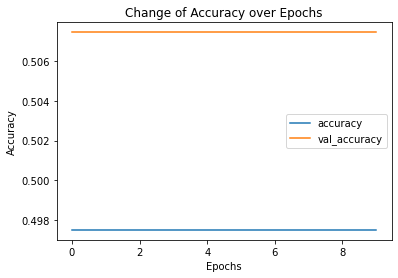

In [50]:
#Plot of accuracy vs validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

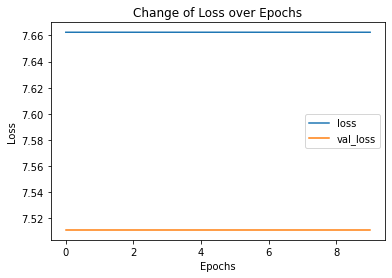

In [51]:
#Plot of loss vs validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()